<!--NAVIGATION-->
< [误差可视化](04.03-Errorbars.ipynb) | [目录](Index.ipynb) | [直方图, 分桶和密度](04.05-Histograms-and-Binnings.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.04-Density-and-Contour-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Density and Contour Plots

# 密度和轮廓图

> Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.
This section looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use: 

有些情况下，我们需要在二维图表中使用轮廓或颜色区域来展示三维的数据（可以设想等高线地图或温度分布图）。Matplotlib提供了三个有用的函数来处理这项任务：`plt.contour`绘制轮廓图，`plt.contourf`来绘制填充区域颜色的图表以及`plt.imshow`来展示图像。本节会介绍几个使用它们的例子。当然我们还是首先从将需要使用的包导入notebook和初始化工作开始：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualizing a Three-Dimensional Function

## 三维可视化函数

> We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$ (we've seen this before in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb), when we used it as a motivating example for array broadcasting):

我们首先使用一个简单的函数$z = f(x, y)$绘制一个轮廓图来进行说明，下面的这个函数我们在[在数组上计算：广播](02.05-Computation-on-arrays-broadcasting.ipynb)一节中已经见过，那里我们用来作为数组广播运算的例子：

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

> A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

轮廓图可以使用`plt.contour`函数进行创建。它接收三个参数：*x*参数代表三维网格的平面横轴坐标，*y*参数代表三维网格的平面纵轴坐标，而*z*参数代表三维网格的高度坐标。最容易用来准备这种网格数据的是`np.meshgrid`函数，可以将两个一维的数组构造成一个二维的网格：

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

> Now let's look at this with a standard line-only contour plot:

下面我们可以绘制标准的轮廓线图表：

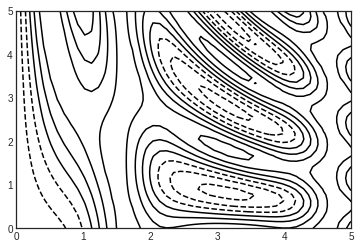

In [4]:
plt.contour(X, Y, Z, colors='black');

> Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

图中值得注意的是，当使用单色绘制轮廓图时，虚线代表的是负数的数值，而实线代表的是正数。而轮廓线可以通过指定`cmap`参数来设置线条的色图。下例中展示了使用色图且绘制了更多的轮廓线的例子，会在整个数据范围区域内等距分布有20条轮廓线：

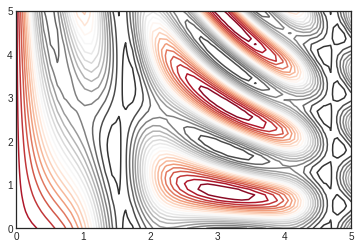

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

> Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:

上例中我们选择了`RdGy`（*Red-Gray*的缩写）色图，这对于聚集的数据来说是一个不错的选择。Matplotlib有大量的颜色图可供使用，你可以通过在IPython中对`plt.cm`模块使用TAB自动补全方法就可以看到：

```
plt.cm.<TAB>
```

> Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

上面的图看起来比第一幅图好多了，但是线条之间的空隙还是有点让人混淆。我们可以将上面的图改为填充轮廓图来解决这个问题，使用`plt.contourf()`函数（注意函数名最后有个f，代表填充fill），这个函数的语法基本上与`plt.contour()`保持一致。

> Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

并且我们加上了`plt.colorbar()`函数，这个函数会在图表边上创建一个颜色图例用以展示颜色所表示的数值区域：

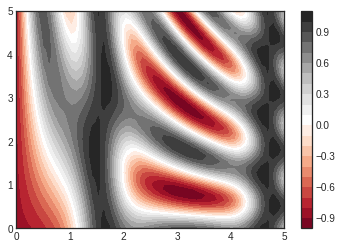

In [6]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

> The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

有了图例，很容易可以看出黑色区域代表着“峰”，而红色区域代表这“谷”。

> One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

上图有一个缺点，那就是图中颜色的阶梯是离散的而不是连续的，这通常不是我们想要的。我们可以通过设置很高的轮廓线数量来改善，但是这会导致绘制图表的性能降低：Matplotlib必须在每个颜色阶梯上绘制一条新的轮廓多边形。更好的办法是使用`plt.imshow()`函数，它会将一个二维的网格图表转换为一张图像。

> The following code shows this:

下面的例子展示了该方法：

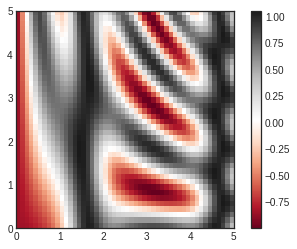

In [7]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

> There are a few potential gotchas with ``imshow()``, however:

> - ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
> - ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
> - ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

然而，在使用`imshow()`的时候也有一些坑：

- `plt.imshow()`不接受x和y网格值作为参数，因此你需要手动指定*extent*参数[*xmin*, *xmax*, *ymin*, *ymax*]来设置图表的数据范围。
- `plt.imshow()`使用的是默认的图像坐标，即左上角坐标点是原点，而不是通常图表的左下角坐标点。这可以通过设置`origin`参数来设置。
- `plt.imshow()`会自动根据输入数据调整坐标轴的比例；这可以通过参数来设置，例如，`plt.axis(aspect='image')`能让x和y轴的单位一致。

> Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

最后，有时可能需要将轮廓图和图像结合起来。例如，下例中我们使用了半透明的背景图像（通过`alpha`参数设置透明度），然后在背景图层之上绘制了轮廓图，并带有每个轮廓的数值标签（使用`plt.clabel()`函数绘制标签）：

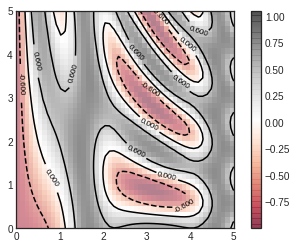

In [8]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

> The combination of these three functions—``plt.contour``, ``plt.contourf``, and ``plt.imshow``—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.
If you are interested in three-dimensional visualizations of this type of data, see [Three-dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb).

通过组合使用`plt.contour`、`plt.contourf`和`plt.imshow`这三个函数，基本可以满足我们绘制所有这种在二维图标上的三维数据的需求。需要了解更多函数的参数信息，参考它们的文档字符串。如果你对于使用三维图表展示这种数据感兴趣，参见[在matplotlib中创建三维图表](04.12-Three-Dimensional-Plotting.ipynb)。

<!--NAVIGATION-->
< [误差可视化](04.03-Errorbars.ipynb) | [目录](Index.ipynb) | [直方图, 分桶和密度](04.05-Histograms-and-Binnings.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.04-Density-and-Contour-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
